In [1]:
#Libraries
import pandas as pd
import chardet
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
pd.options.mode.copy_on_write = True 

In [2]:
# CSV file path local
file_path = 'ds_challenge_data_2024.csv'

# Detectar la codificación del archivo
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

# Leer el archivo con la codificación detectada
data = pd.read_csv(file_path, encoding=result['encoding'])


In [3]:
data.head()

,transaction_id,user_id,género,linea_tc,interes_tc,monto,fecha,hora,dispositivo,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude
0,1,573,M,87000,56,581.03,02/01/20,0,"{'año': 2019, 'marca': 'Apple', 'proveedor': '...",Farmacia,Ciudad de México,Aceptada,False,0.0,17.43,False
1,2,737,F,34000,51,421.73,02/01/20,0,"{'año': 2021, 'marca': 'Huawei', 'proveedor': ...",Tienda departamental,Cancún,Aceptada,False,0.0,12.65,False
2,3,887,F,52000,38,399.55,02/01/20,0,"{'año': 2017, 'marca': 'Apple', 'proveedor': '...",Farmacia,Tijuana,En proceso,False,0.0,11.99,False
3,4,1304,M,67000,60,828.01,02/01/20,0,"{'año': 2019, 'marca': 'Samsung', 'proveedor':...",Tienda departamental,Ciudad de México,En proceso,False,0.0,24.84,False
4,5,1361,F,28000,52,886.04,02/01/20,0,"{'año': 2021, 'marca': 'Samsung', 'proveedor':...",Supermercado,Cancún,Aceptada,False,0.0,26.58,False


In [4]:
data.shape

(26975, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26975 entries, 0 to 26974
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transaction_id   26975 non-null  int64  
 1   user_id          26975 non-null  int64  
 2   género           26975 non-null  object 
 3   linea_tc         26975 non-null  int64  
 4   interes_tc       26975 non-null  int64  
 5   monto            26975 non-null  float64
 6   fecha            26975 non-null  object 
 7   hora             26975 non-null  int64  
 8   dispositivo      26975 non-null  object 
 9   establecimiento  24036 non-null  object 
 10  ciudad           26641 non-null  object 
 11  status_txn       26975 non-null  object 
 12  is_prime         26975 non-null  bool   
 13  dcto             26975 non-null  float64
 14  cashback         26975 non-null  float64
 15  fraude           26975 non-null  bool   
dtypes: bool(2), float64(3), int64(5), object(6)
memory usage: 

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,26975.0,13488.000000,7787.156092,1.00,6744.500,13488.00,20231.500,26975.00
user_id,26975.0,2003.765412,1144.630736,0.00,1041.000,2006.00,2973.500,3999.00
linea_tc,26975.0,62476.811863,21886.892902,25000.00,44000.000,62000.00,82000.000,99000.00
interes_tc,26975.0,48.224875,9.587256,32.00,40.000,48.00,57.000,64.00
monto,26975.0,513.796463,290.342419,1.00,300.490,506.38,716.515,1712.70
hora,26975.0,12.657498,5.657335,0.00,9.000,13.00,17.000,23.00
dcto,26975.0,5.369477,12.322335,0.00,0.000,0.00,0.000,85.64
cashback,26975.0,16.924524,10.893845,0.03,9.495,15.93,22.830,109.73


In [7]:
data.isnull().sum()

transaction_id        0
user_id               0
género                0
linea_tc              0
interes_tc            0
monto                 0
fecha                 0
hora                  0
dispositivo           0
establecimiento    2939
ciudad              334
status_txn            0
is_prime              0
dcto                  0
cashback              0
fraude                0
dtype: int64

In [8]:
data['ciudad'] = data['ciudad'].fillna('otras')
data['establecimiento'] = data['establecimiento'].fillna('otros')

In [9]:
data.isnull().sum()

transaction_id     0
user_id            0
género             0
linea_tc           0
interes_tc         0
monto              0
fecha              0
hora               0
dispositivo        0
establecimiento    0
ciudad             0
status_txn         0
is_prime           0
dcto               0
cashback           0
fraude             0
dtype: int64

In [10]:
data_fraud = data[data['fraude'] == True]
data_normal = data[data['fraude'] == False]

In [11]:
def percentages(analysis_variable: str,df: pd.DataFrame,title: str) -> None:
  print(title)
  conteo = df[analysis_variable].value_counts()
  print(conteo)
  print("Porcentaje de "+ title)
  percentage = df[analysis_variable].value_counts(normalize=True) * 100
  print(percentage)
  colors = sns.color_palette('pastel')
  plt.pie(percentage, colors = colors, autopct='%1.1f%%',labels =percentage.index)
  plt.title(title)
  plt.show()
  pass

In [12]:
def bar_graphics(analysis_variable: str,data_1: pd.DataFrame,data_2: pd.DataFrame,title_1: str,title_2: str,nrows: int=1, ncols:int=1,heigth:int = 5,width: int = 15)-> None:
  fig, axs = plt.subplots(ncols=ncols,nrows=nrows)
  fig.set_figheight(heigth)
  fig.set_figwidth(width)
  sns.countplot(x=analysis_variable, data=data_1, ax=axs[0]).set_title(title_1)
  sns.countplot(x=analysis_variable, data=data_2, ax=axs[1]).set_title(title_2)
  plt.show()
  pass

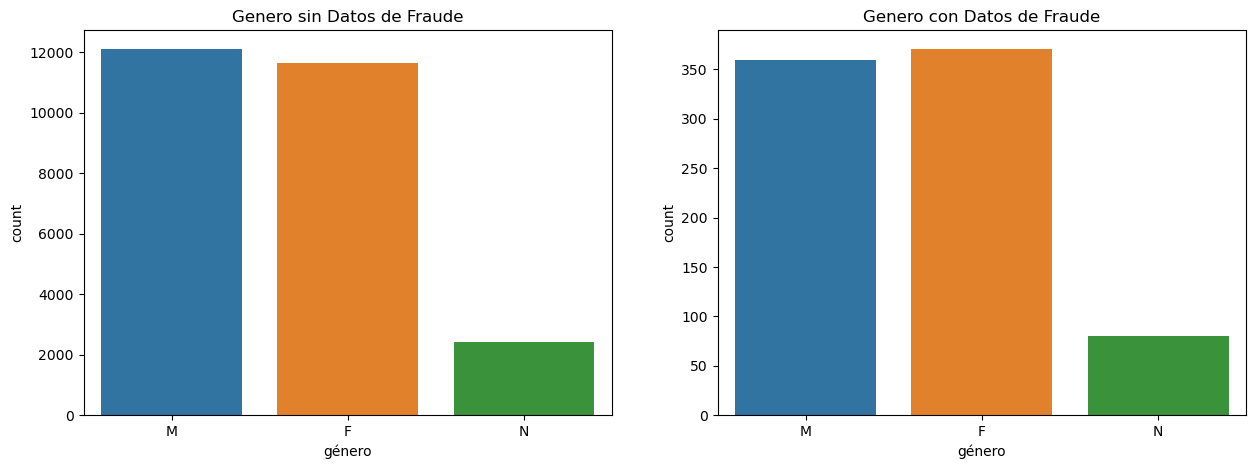

In [13]:
bar_graphics('género', data_normal,data_fraud,"Genero sin Datos de Fraude","Genero con Datos de Fraude",ncols=2)

Genero sin Datos de Fraude
género
M    12113
F    11629
N     2423
Name: count, dtype: int64
Porcentaje de Genero sin Datos de Fraude
género
M    46.294668
F    44.444869
N     9.260462
Name: proportion, dtype: float64


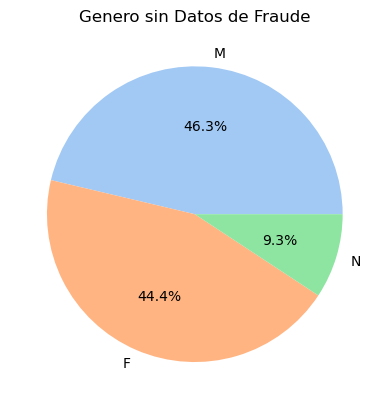

Genero con Datos de Fraude
género
F    371
M    359
N     80
Name: count, dtype: int64
Porcentaje de Genero con Datos de Fraude
género
F    45.802469
M    44.320988
N     9.876543
Name: proportion, dtype: float64


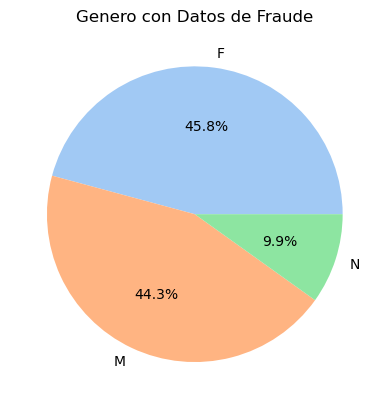

In [14]:
percentages('género', data_normal,"Genero sin Datos de Fraude")
percentages('género', data_fraud,"Genero con Datos de Fraude")

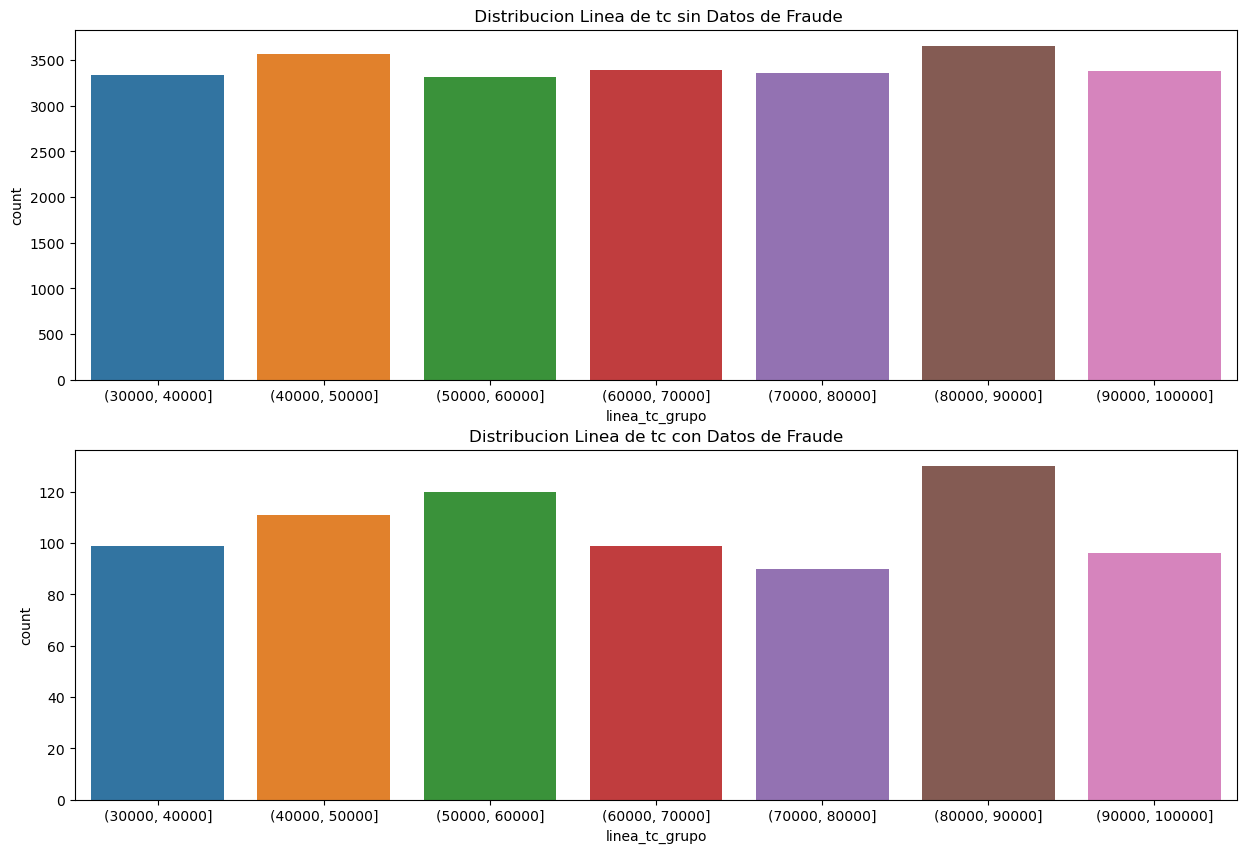

In [15]:
bins = np.arange(30000, 110000, 10000)
data_normal['linea_tc_grupo'] = pd.cut(data_normal['linea_tc'], bins=bins)
data_fraud['linea_tc_grupo'] = pd.cut(data_fraud['linea_tc'], bins=bins)
bar_graphics('linea_tc_grupo', data_normal,data_fraud," Distribucion Linea de tc sin Datos de Fraude","Distribucion Linea de tc con Datos de Fraude",
             nrows=2,heigth=10)

Distribucion de linea_tc sin datos fraude
linea_tc_grupo
(80000, 90000]     3650
(40000, 50000]     3560
(60000, 70000]     3387
(90000, 100000]    3384
(70000, 80000]     3352
(30000, 40000]     3339
(50000, 60000]     3316
Name: count, dtype: int64
Porcentaje de Distribucion de linea_tc sin datos fraude
linea_tc_grupo
(80000, 90000]     15.215941
(40000, 50000]     14.840754
(60000, 70000]     14.119560
(90000, 100000]    14.107054
(70000, 80000]     13.973653
(30000, 40000]     13.919460
(50000, 60000]     13.823578
Name: proportion, dtype: float64


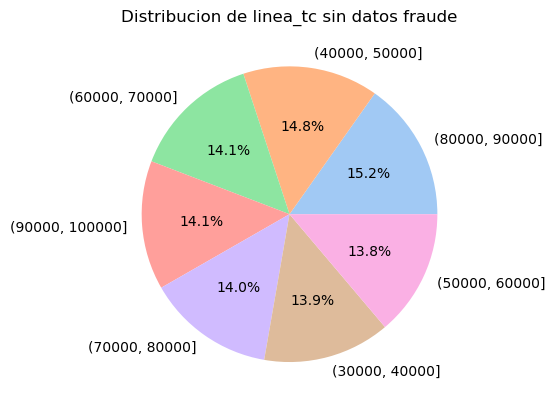

Distribucion de linea_tc con datos fraude
linea_tc_grupo
(80000, 90000]     130
(50000, 60000]     120
(40000, 50000]     111
(30000, 40000]      99
(60000, 70000]      99
(90000, 100000]     96
(70000, 80000]      90
Name: count, dtype: int64
Porcentaje de Distribucion de linea_tc con datos fraude
linea_tc_grupo
(80000, 90000]     17.449664
(50000, 60000]     16.107383
(40000, 50000]     14.899329
(30000, 40000]     13.288591
(60000, 70000]     13.288591
(90000, 100000]    12.885906
(70000, 80000]     12.080537
Name: proportion, dtype: float64


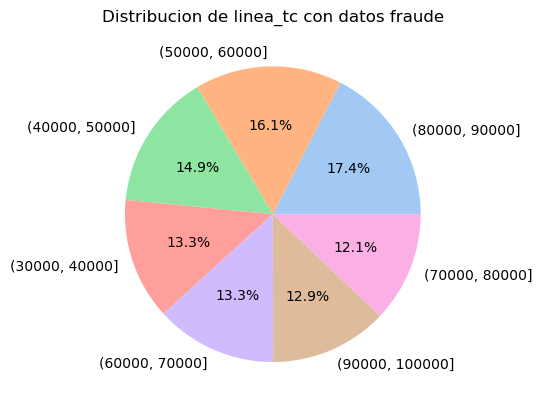

In [16]:
percentages('linea_tc_grupo',data_normal,"Distribucion de linea_tc sin datos fraude")
percentages('linea_tc_grupo',data_fraud,"Distribucion de linea_tc con datos fraude")

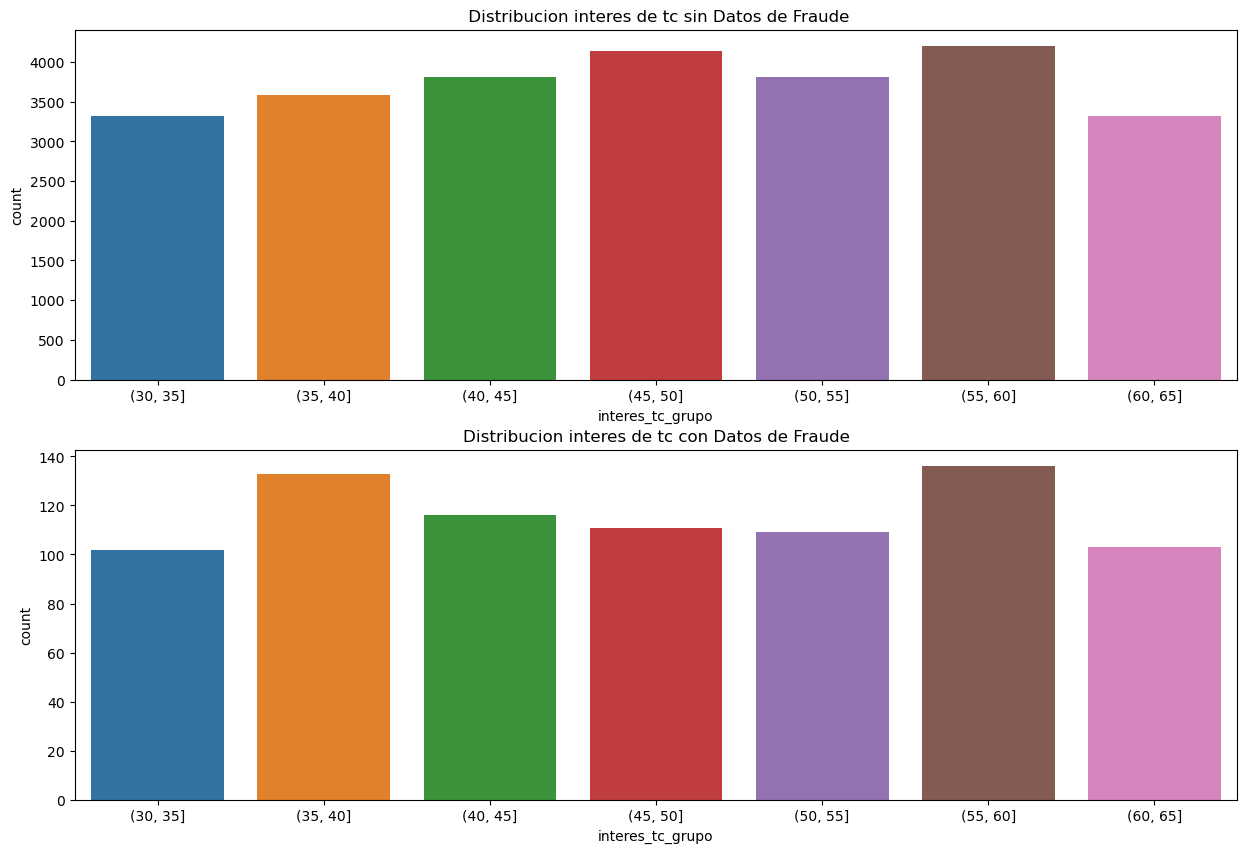

In [17]:
bins = np.arange(30, 70, 5)
data_normal['interes_tc_grupo'] = pd.cut(data_normal['interes_tc'], bins=bins)
data_fraud['interes_tc_grupo'] = pd.cut(data_fraud['interes_tc'], bins=bins)
bar_graphics('interes_tc_grupo', data_normal,data_fraud," Distribucion interes de tc sin Datos de Fraude","Distribucion interes de tc con Datos de Fraude",
             nrows=2,heigth=10)

Distribucion de interes_tc sin datos fraude
interes_tc_grupo
(55, 60]    4197
(45, 50]    4132
(40, 45]    3812
(50, 55]    3807
(35, 40]    3584
(60, 65]    3317
(30, 35]    3316
Name: count, dtype: int64
Porcentaje de Distribucion de interes_tc sin datos fraude
interes_tc_grupo
(55, 60]    16.040512
(45, 50]    15.792089
(40, 45]    14.569081
(50, 55]    14.549971
(35, 40]    13.697688
(60, 65]    12.677241
(30, 35]    12.673419
Name: proportion, dtype: float64


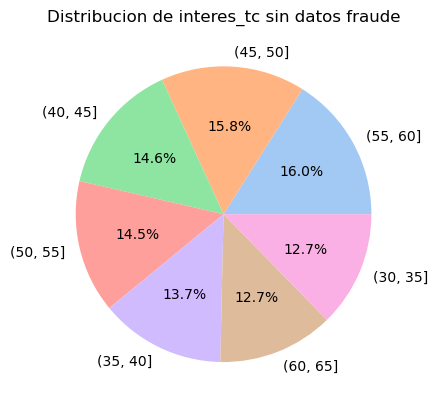

Distribucion de interes_tc con datos fraude
interes_tc_grupo
(55, 60]    136
(35, 40]    133
(40, 45]    116
(45, 50]    111
(50, 55]    109
(60, 65]    103
(30, 35]    102
Name: count, dtype: int64
Porcentaje de Distribucion de interes_tc con datos fraude
interes_tc_grupo
(55, 60]    16.790123
(35, 40]    16.419753
(40, 45]    14.320988
(45, 50]    13.703704
(50, 55]    13.456790
(60, 65]    12.716049
(30, 35]    12.592593
Name: proportion, dtype: float64


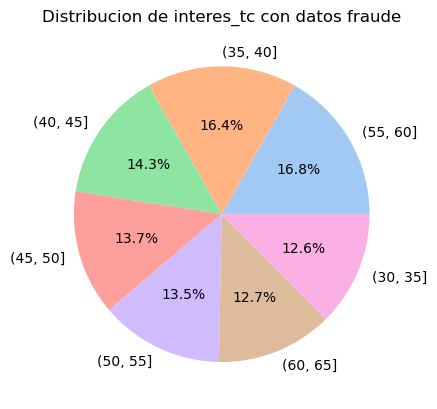

In [18]:
percentages('interes_tc_grupo',data_normal,"Distribucion de interes_tc sin datos fraude")
percentages('interes_tc_grupo',data_fraud,"Distribucion de interes_tc con datos fraude")

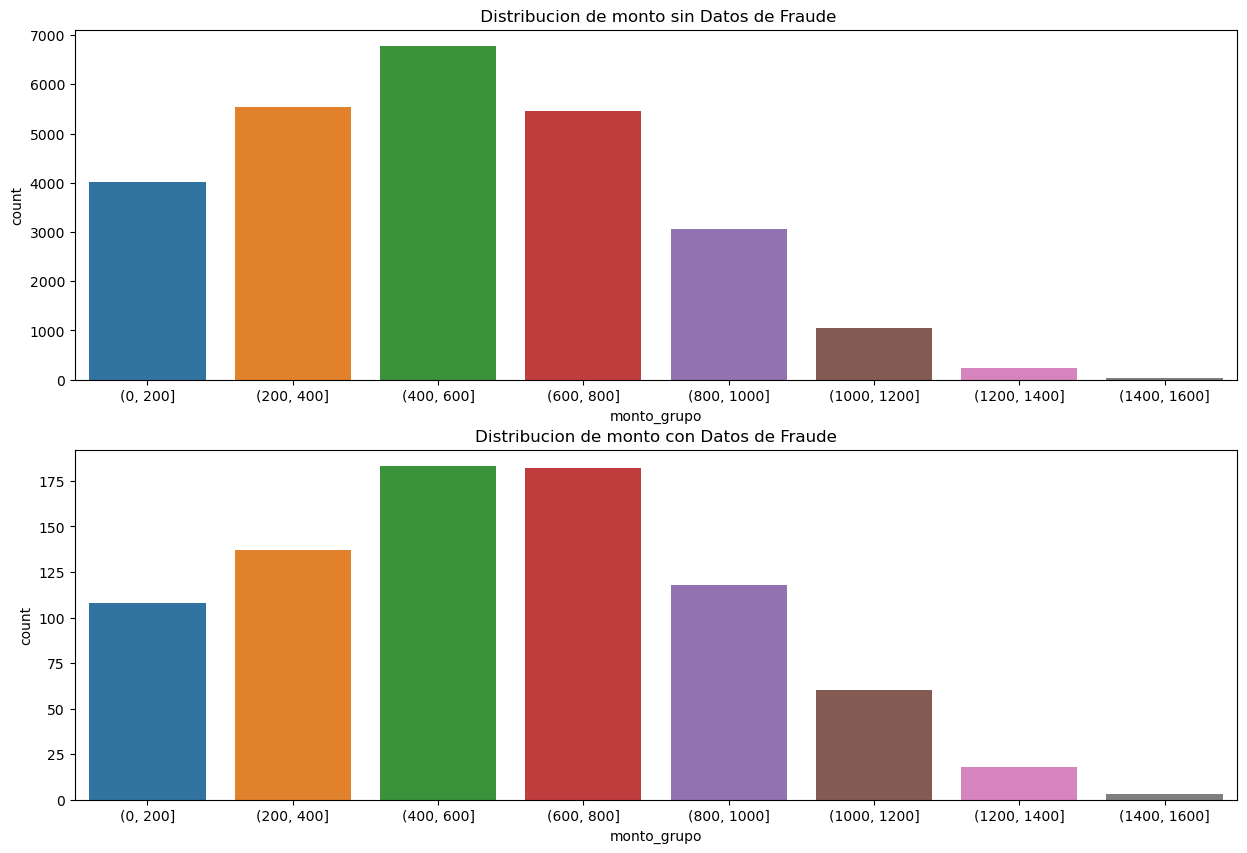

In [19]:
bins = np.arange(0, 1800, 200)
data_normal['monto_grupo'] = pd.cut(data_normal['monto'], bins=bins)
data_fraud['monto_grupo'] = pd.cut(data_fraud['monto'], bins=bins)
bar_graphics('monto_grupo', data_normal,data_fraud," Distribucion de monto sin Datos de Fraude","Distribucion de monto con Datos de Fraude",
             nrows=2,heigth=10)

In [20]:
data_normal['fecha'] = pd.to_datetime(data_normal['fecha'])
data_normal['dia_semana'] = data_normal['fecha'].dt.day_name()
data_fraud['fecha'] = pd.to_datetime(data_fraud['fecha'])
data_fraud['dia_semana'] = data_fraud['fecha'].dt.day_name()

C:\Users\kadam\AppData\Local\Temp\ipykernel_26768\2914091194.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_normal['fecha'] = pd.to_datetime(data_normal['fecha'])
C:\Users\kadam\AppData\Local\Temp\ipykernel_26768\2914091194.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_fraud['fecha'] = pd.to_datetime(data_fraud['fecha'])


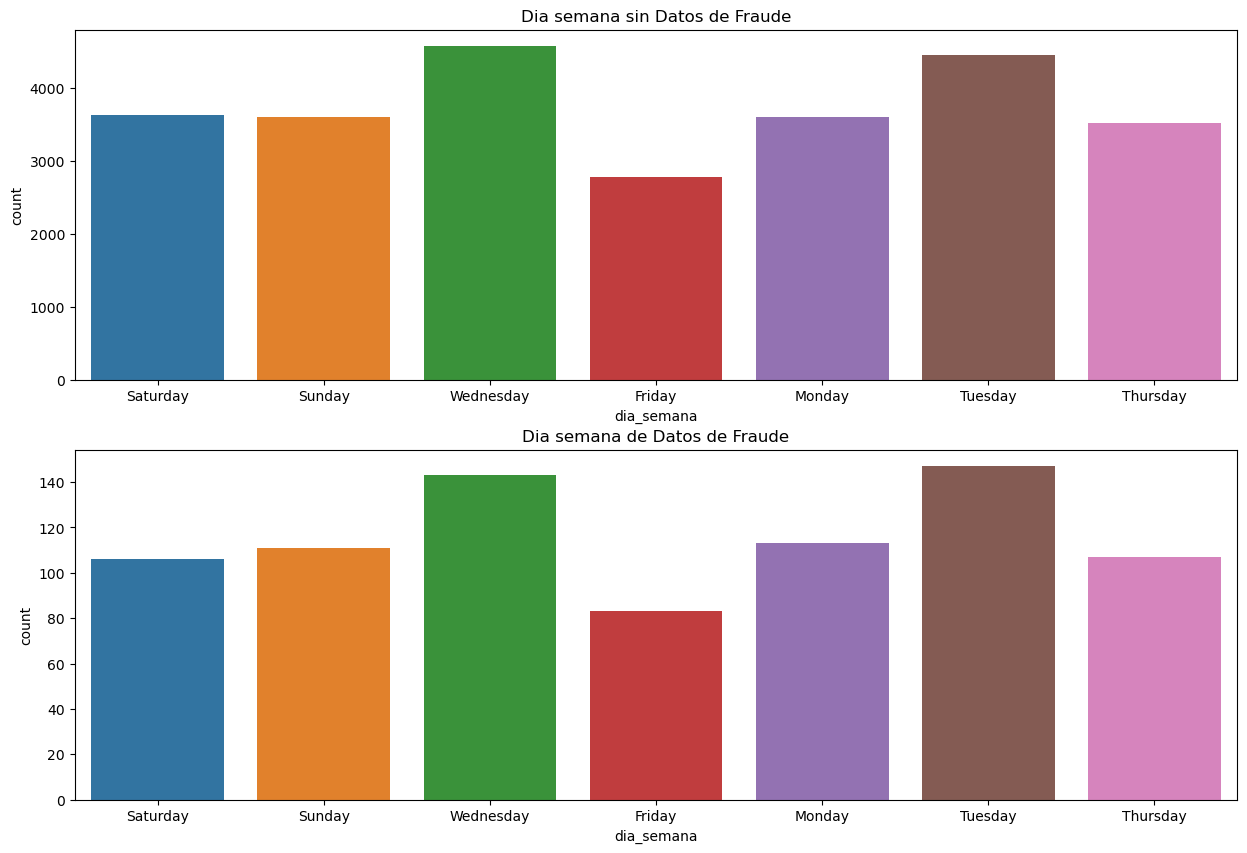

In [21]:
bar_graphics('dia_semana', data_normal,data_fraud,"Dia semana sin Datos de Fraude","Dia semana de Datos de Fraude",nrows=2,heigth=10)

Distribucion de dia_semana sin datos fraude
dia_semana
Wednesday    4574
Tuesday      4452
Saturday     3635
Monday       3609
Sunday       3598
Thursday     3523
Friday       2774
Name: count, dtype: int64
Porcentaje de Distribucion de dia_semana sin datos fraude
dia_semana
Wednesday    17.481368
Tuesday      17.015097
Saturday     13.892605
Monday       13.793235
Sunday       13.751194
Thursday     13.464552
Friday       10.601949
Name: proportion, dtype: float64


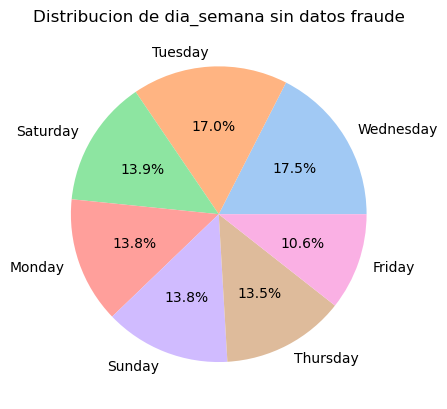

Distribucion de dia_semana con datos fraude
dia_semana
Tuesday      147
Wednesday    143
Monday       113
Sunday       111
Thursday     107
Saturday     106
Friday        83
Name: count, dtype: int64
Porcentaje de Distribucion de dia_semana con datos fraude
dia_semana
Tuesday      18.148148
Wednesday    17.654321
Monday       13.950617
Sunday       13.703704
Thursday     13.209877
Saturday     13.086420
Friday       10.246914
Name: proportion, dtype: float64


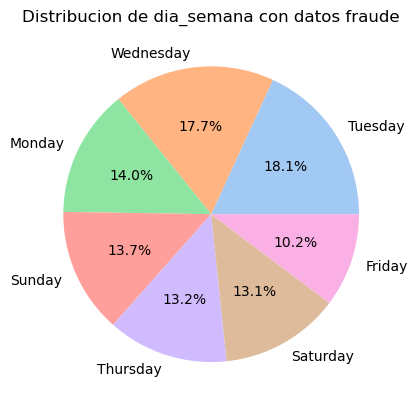

In [22]:
percentages('dia_semana',data_normal,"Distribucion de dia_semana sin datos fraude")
percentages('dia_semana',data_fraud,"Distribucion de dia_semana con datos fraude")

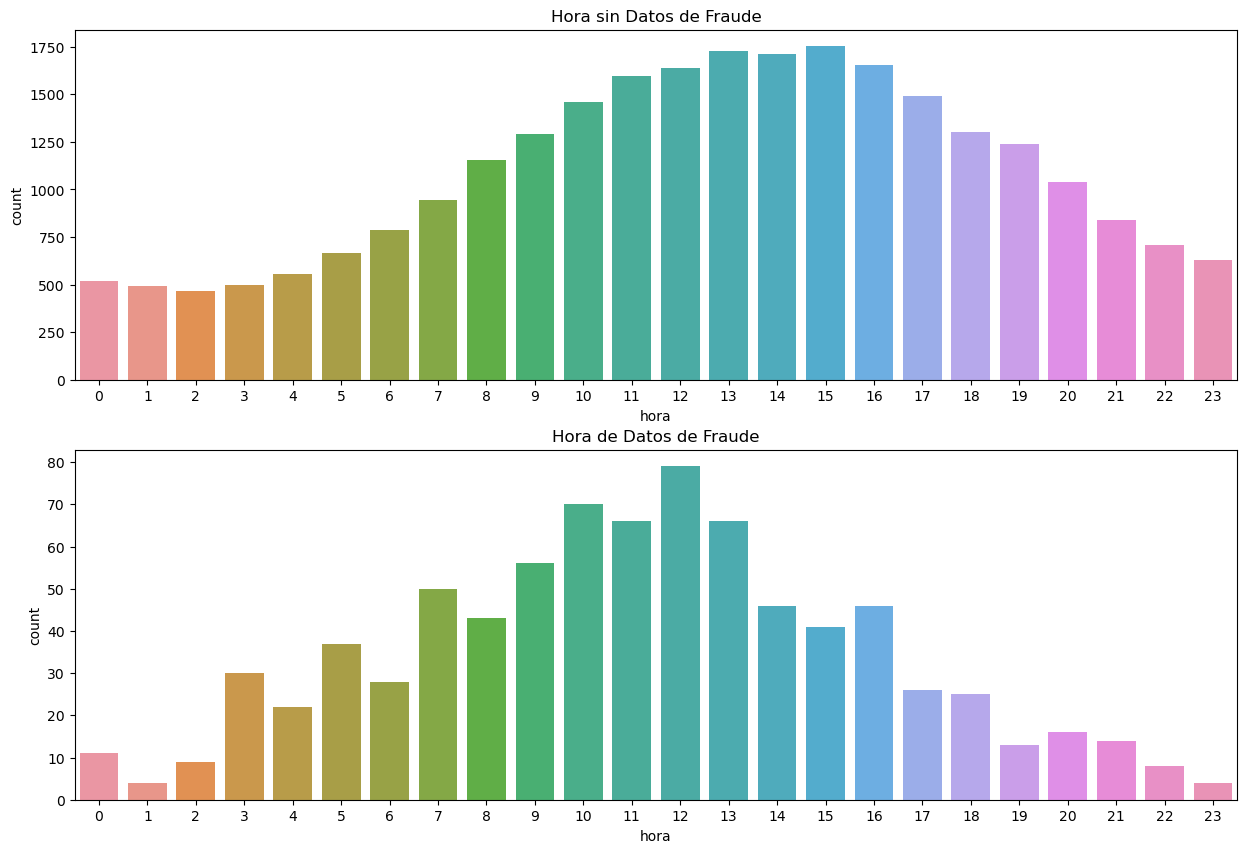

In [23]:
bar_graphics('hora', data_normal,data_fraud,"Hora sin Datos de Fraude","Hora de Datos de Fraude",nrows=2,heigth=10)

In [24]:
data_normal['columna_diccionario'] = data_normal['dispositivo'].apply(ast.literal_eval)
data_normal[['ano', 'marca','proveedor']] = data_normal['columna_diccionario'].apply(pd.Series)
data_fraud['columna_diccionario'] = data_fraud['dispositivo'].apply(ast.literal_eval)
data_fraud[['ano', 'marca','proveedor']] = data_fraud['columna_diccionario'].apply(pd.Series)

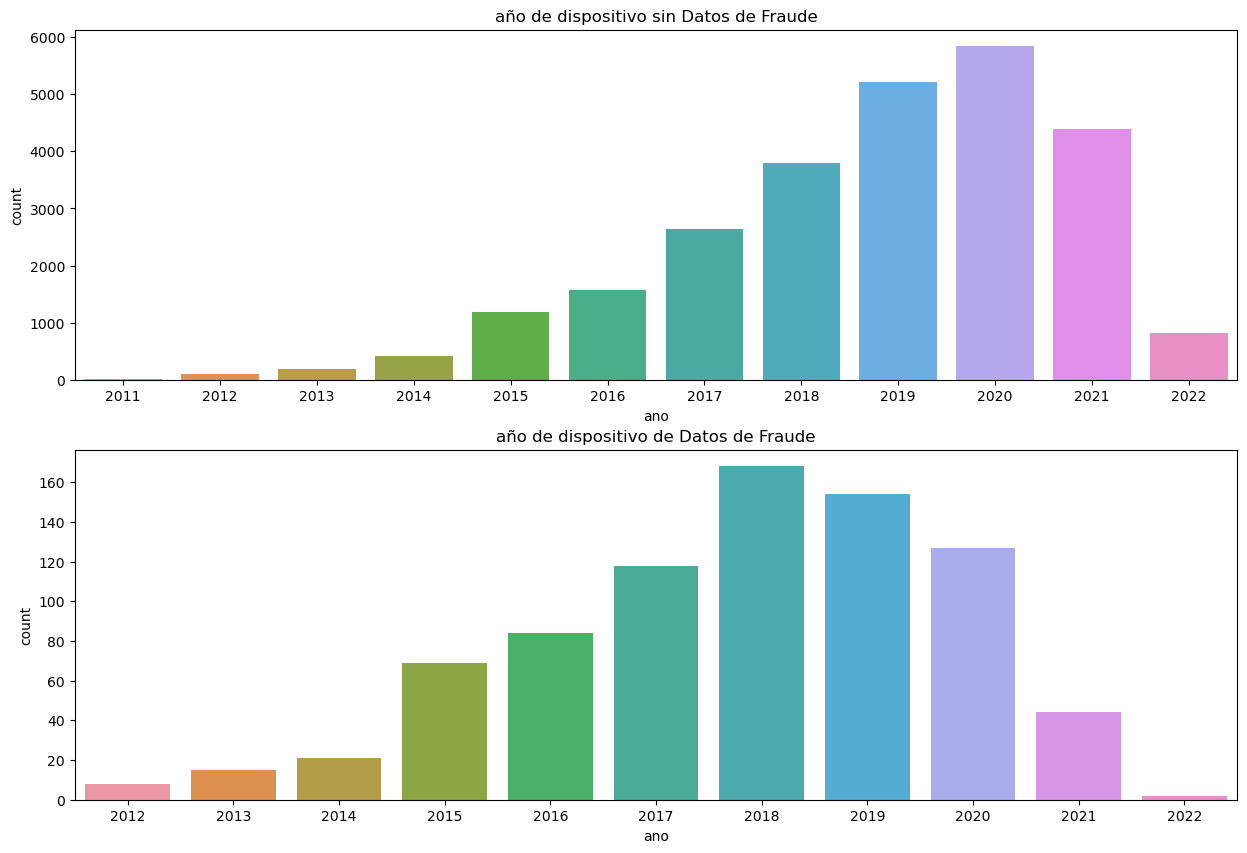

In [25]:
bar_graphics('ano', data_normal,data_fraud,"año de dispositivo sin Datos de Fraude","año de dispositivo de Datos de Fraude",nrows=2,heigth=10)

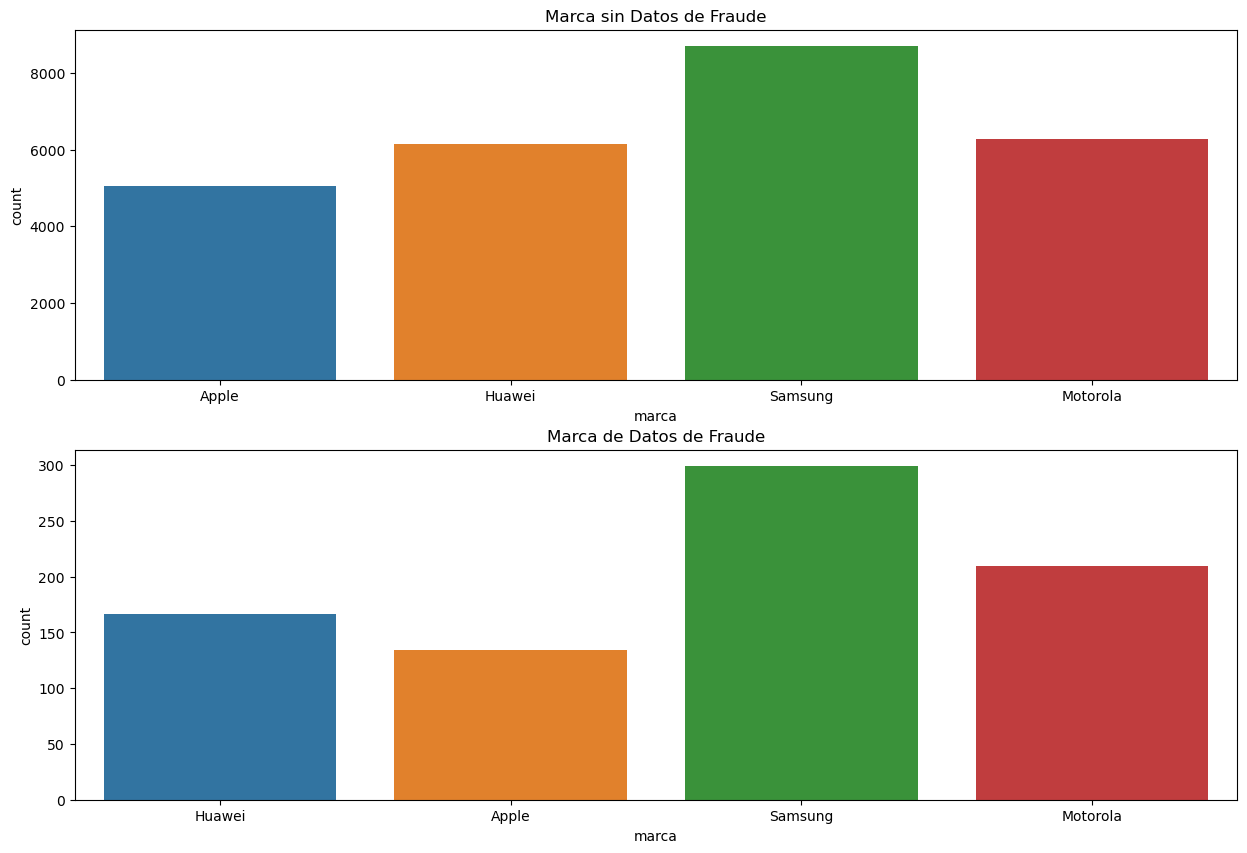

In [26]:
bar_graphics('marca', data_normal,data_fraud,"Marca sin Datos de Fraude","Marca de Datos de Fraude",nrows=2,heigth=10)

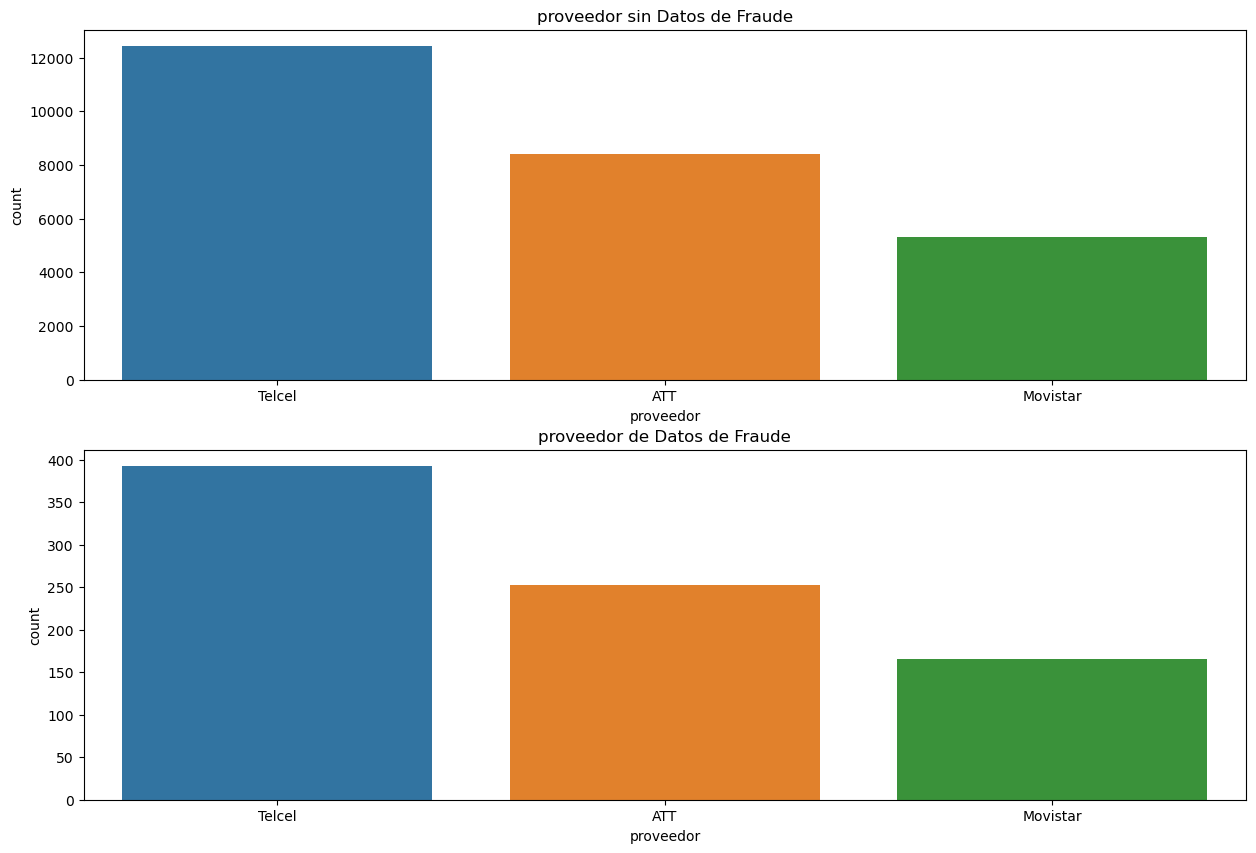

In [27]:
bar_graphics('proveedor', data_normal,data_fraud,"proveedor sin Datos de Fraude","proveedor de Datos de Fraude",nrows=2,heigth=10)

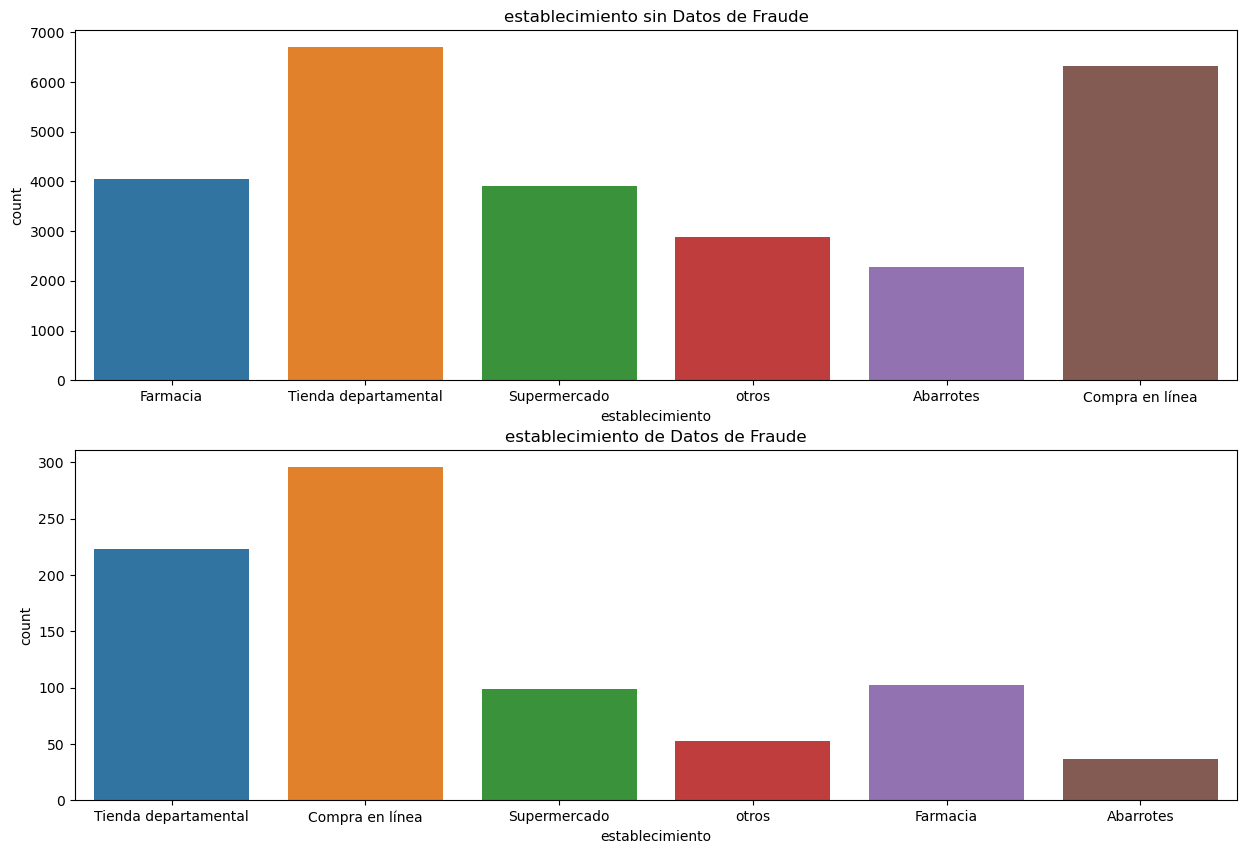

In [28]:
bar_graphics('establecimiento', data_normal,data_fraud,"establecimiento sin Datos de Fraude","establecimiento de Datos de Fraude",nrows=2,heigth=10)

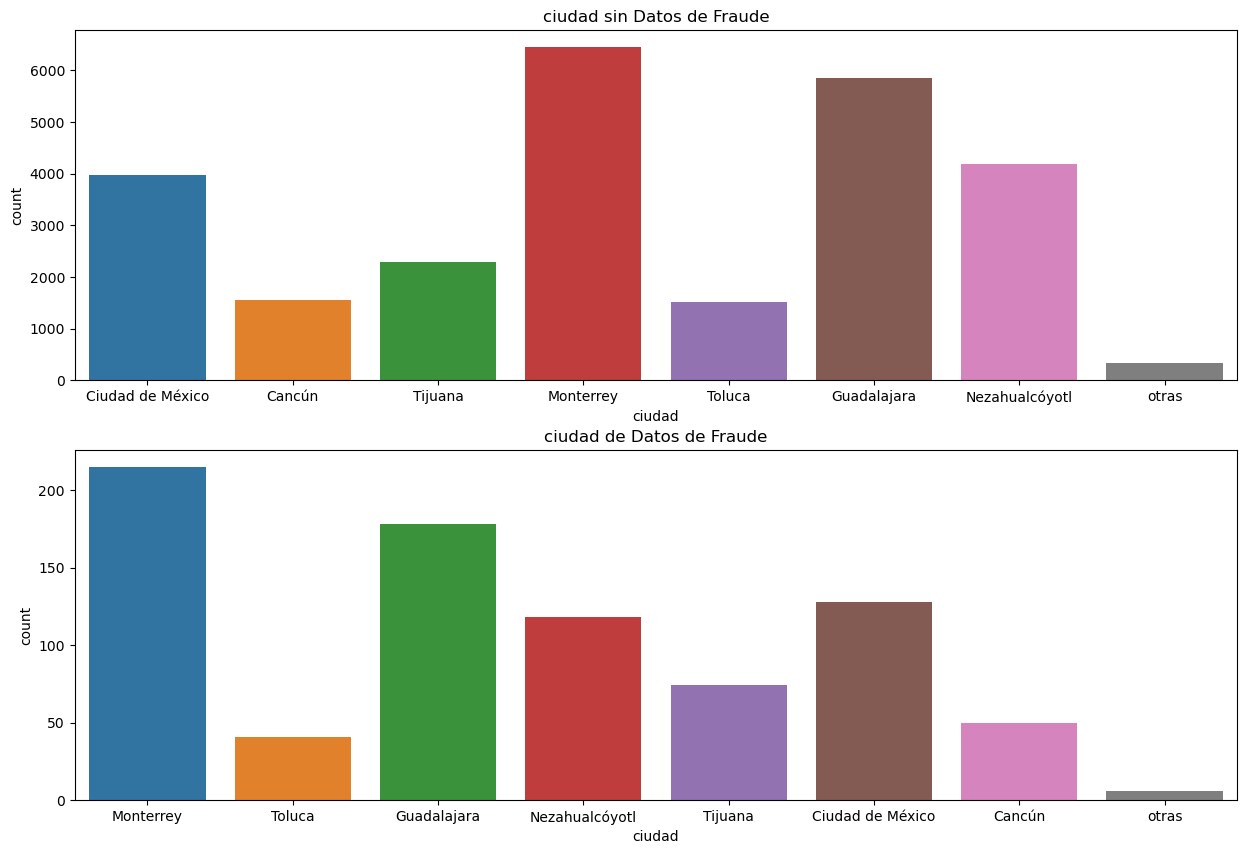

In [29]:
bar_graphics('ciudad', data_normal,data_fraud,"ciudad sin Datos de Fraude","ciudad de Datos de Fraude",nrows=2,heigth=10)

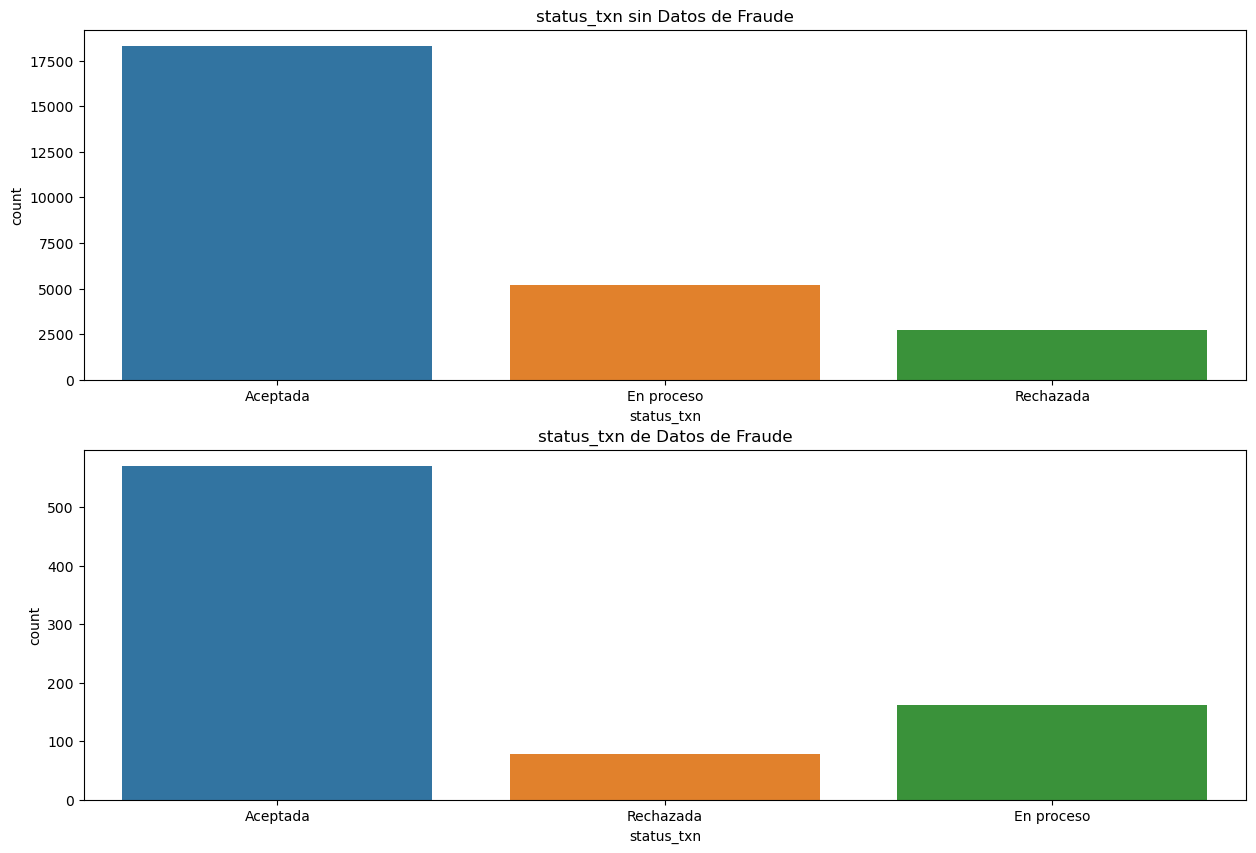

In [30]:
bar_graphics('status_txn', data_normal,data_fraud,"status_txn sin Datos de Fraude","status_txn de Datos de Fraude",nrows=2,heigth=10)

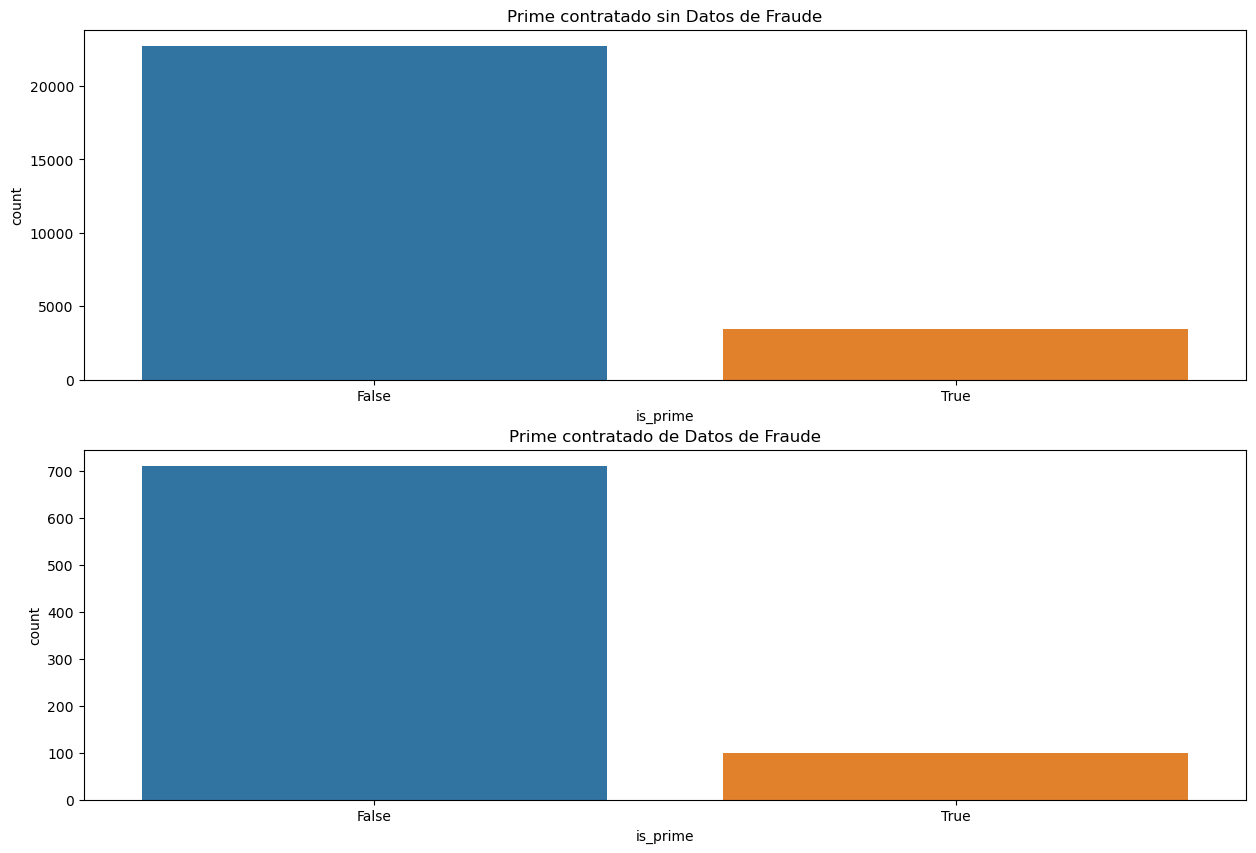

In [31]:
bar_graphics('is_prime', data_normal,data_fraud,"Prime contratado sin Datos de Fraude","Prime contratado de Datos de Fraude",nrows=2,heigth=10)

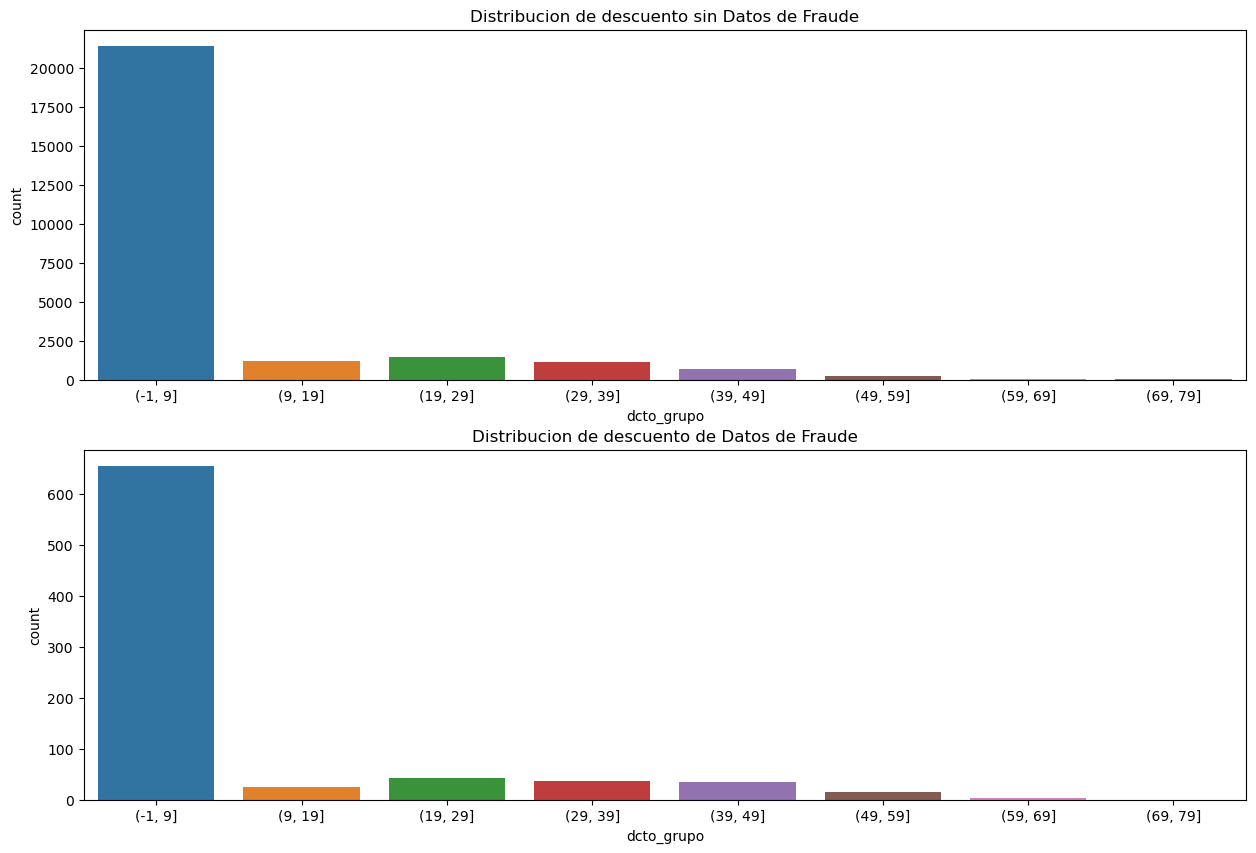

In [32]:
bins = np.arange(-1, 80, 10)
data_normal['dcto_grupo'] = pd.cut(data_normal['dcto'], bins=bins)
data_fraud['dcto_grupo'] = pd.cut(data_fraud['dcto'], bins=bins)
bar_graphics('dcto_grupo', data_normal,data_fraud,"Distribucion de descuento sin Datos de Fraude","Distribucion de descuento de Datos de Fraude",nrows=2,heigth=10)

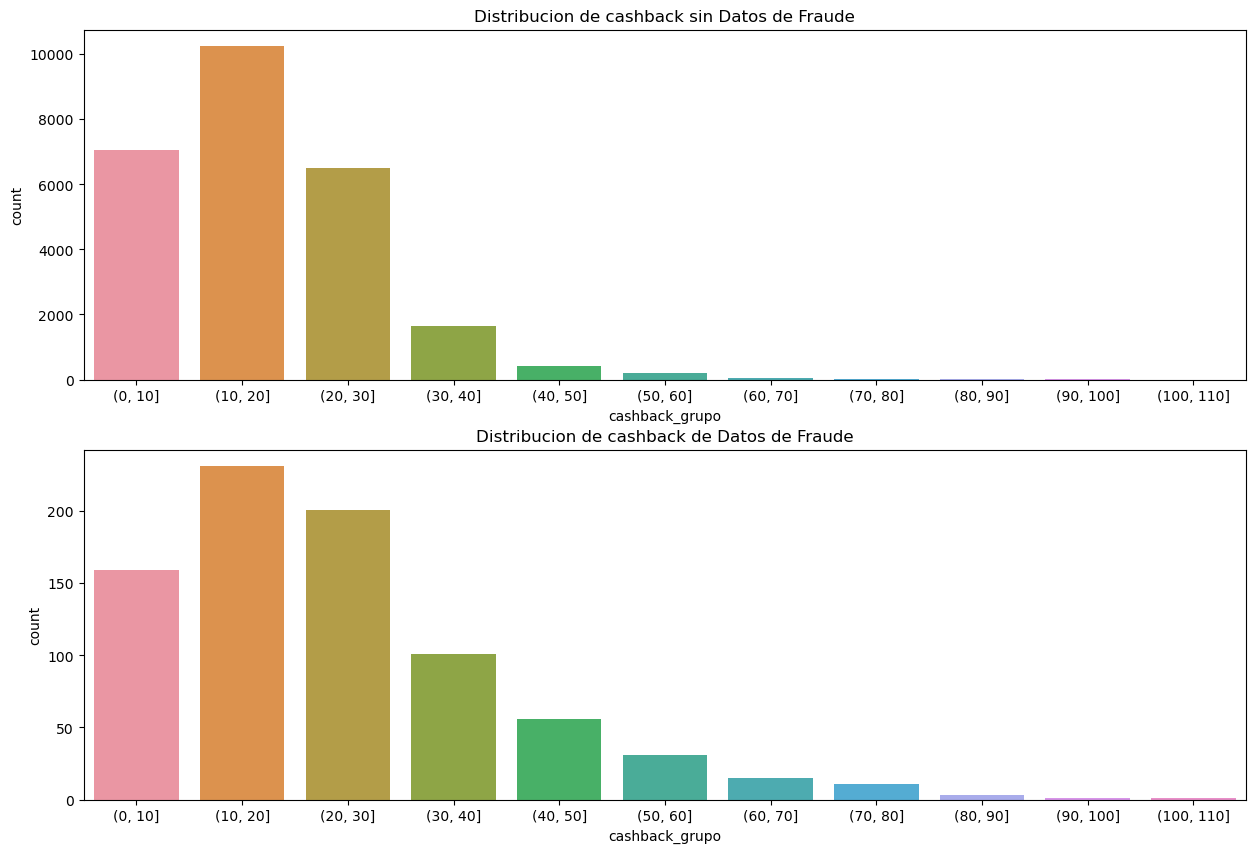

In [33]:
bins = np.arange(0, 120, 10)
data_normal['cashback_grupo'] = pd.cut(data_normal['cashback'], bins=bins)
data_fraud['cashback_grupo'] = pd.cut(data_fraud['cashback'], bins=bins)
bar_graphics('cashback_grupo', data_normal,data_fraud,"Distribucion de cashback sin Datos de Fraude","Distribucion de cashback de Datos de Fraude",nrows=2,heigth=10)

In [34]:
data_dcto_isnt_prime = data[ (data['dcto'] > 0) & (data['is_prime'] == False)  ]
data_dcto_isnt_prime.head()

,transaction_id,user_id,género,linea_tc,interes_tc,monto,fecha,hora,dispositivo,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude
25,26,3461,M,86000,33,191.71,02/01/20,1,"{'año': 2017, 'marca': 'Samsung', 'proveedor':...",Abarrotes,Nezahualcóyotl,Aceptada,False,9.59,5.75,False
26,27,3993,N,98000,63,874.34,02/01/20,1,"{'año': 2015, 'marca': 'Huawei', 'proveedor': ...",Compra en línea,Tijuana,En proceso,False,43.72,26.23,False
35,36,2338,M,78000,41,1.00,02/01/20,2,"{'año': 2018, 'marca': 'Samsung', 'proveedor':...",Tienda departamental,Monterrey,Aceptada,False,0.05,0.03,False
37,38,2423,F,53000,58,903.09,02/01/20,2,"{'año': 2014, 'marca': 'Motorola', 'proveedor'...",Farmacia,Nezahualcóyotl,Aceptada,False,45.15,27.09,False
58,59,309,F,74000,32,395.41,02/01/20,4,"{'año': 2017, 'marca': 'Apple', 'proveedor': '...",Compra en línea,Toluca,Aceptada,False,19.77,11.86,True


In [35]:
usuarios_solo_en_df2 = data_fraud[~data_fraud['user_id'].isin(data_normal['user_id'])]
#print(usuarios_solo_en_df2)
usuarios_solo_en_df2.shape

(17, 26)

In [36]:
print(usuarios_solo_en_df2)

       transaction_id  user_id género  linea_tc  interes_tc    monto  \
1438             1439     3922      F     96000          45   155.43   
2232             2233     1873      N     94000          55   831.41   
2898             2899      171      F     87000          41   319.80   
3980             3981     3049      F     93000          33   491.39   
4124             4125     1969      F     90000          62   762.32   
6044             6045     3756      N     65000          48   726.52   
6063             6064     1046      F     30000          33  1408.96   
6110             6111     3756      N     65000          48   981.42   
13939           13940     1090      F     66000          64   823.73   
14611           14612     2297      M     48000          53   793.04   
14727           14728      646      M     82000          53   985.10   
15151           15152     1657      M     41000          39   471.33   
16825           16826      140      N     40000          48   59

In [37]:
print(data_fraud.shape)
cantidad_usuarios_unicos = data_fraud['user_id'].nunique()
print(cantidad_usuarios_unicos)

(810, 26)
675


In [38]:
conteo = data['user_id'].value_counts()
conteo_ordenado = conteo.sort_values(ascending=False)
print(conteo_ordenado)
promedio = conteo_ordenado.mean()
print(f'El promedio de transacciones por usuario es de {promedio}')

user_id
1958    62
320     46
1361    42
2845    42
3678    40
        ..
3704     1
3000     1
1133     1
2924     1
2301     1
Name: count, Length: 4000, dtype: int64
El promedio de transacciones por usuario es de 6.74375


In [39]:
conteo = data_fraud['user_id'].value_counts()
conteo_ordenado = conteo.sort_values(ascending=False)
print(conteo_ordenado)
promedio = conteo_ordenado.mean()
print(f'el primedio de transaciones con fraude de los usuarios con al menos una trasaccion fraudulenta es de {promedio}')

user_id
1872    4
1928    4
1395    4
3913    4
3994    3
       ..
1409    1
1175    1
820     1
2868    1
2886    1
Name: count, Length: 675, dtype: int64
el primedio de transaciones con fraude de los usuarios con al menos una trasaccion fraudulenta es de 1.2


In [40]:
def check(usuario: int,monto: float,ciudad: str,marca: str,ano: int, proveedor: str,establecimiento: str, hora: int,fecha, cashback: int, model: pd.DataFrame)->  (pd.DataFrame, bool):
  flag=0
  monto_grupo = asignar_grupo_monto(monto)
  ciudad_grupo = asignar_grupo_ciudad(ciudad)
  marca_grupo = asignar_grupo_marca(marca)
  cashback_grupo = asignar_grupo_cashback(cashback)
  
  if usuario in model['user_id'].values:
    
    model,flag=check_grupo(usuario,model,monto_grupo,flag, 'monto_promedio')
    model,flag=check_grupo(usuario,model,ciudad_grupo,flag, 'ciudades')
    model,flag=check_grupo(usuario,model,marca_grupo,flag, 'marca')
    model,flag=check_grupo(usuario,model,ano,flag, 'ano')
    #model,flag=check_grupo(usuario,model,proveedor,flag, 'proveedor')
    #model,flag=check_grupo(usuario,model,establecimiento,flag, 'establecimiento')
    #model,flag=check_grupo(usuario,model,hora,flag, 'hora')
    #model,flag=check_numtrans(usuario,model,fecha,flag, 'fecha')
    model,flag=check_grupo(usuario,model,cashback,flag, 'cashback')
    
  else:
    
    new_row = pd.DataFrame({'user_id': [usuario], 'monto_promedio': [[monto_grupo]],'ciudades': [[ciudad_grupo]], 'marca': [[marca_grupo]],
                            'ano': [[ano]], 'proveedor': [[proveedor]], 'establecimiento': [[establecimiento]], 'hora': [[hora]],
                            'fecha': [[fecha]], 'cashback': [[cashback_grupo]]})
    model = pd.concat([model, new_row], ignore_index=True)
  
  
     
  return model,flag

In [41]:
def check_grupo(usuario: int,model: pd.DataFrame,monto_grupo: int,flag: int, variable: str)->  (pd.DataFrame, bool):
  list = model.loc[model['user_id'] == usuario, variable].values[0]
  if monto_grupo not in list:
        flag=flag+1
        model.loc[model['user_id'] == usuario, variable] = model.loc[model['user_id'] == usuario, variable].apply(lambda x: x + [monto_grupo])
  return model,flag

In [42]:
def check_numtrans(usuario: int,model: pd.DataFrame,monto_grupo: int,flag: int, variable: str)->  (pd.DataFrame, bool):
  list = model.loc[model['user_id'] == usuario, variable].values[0]
  if monto_grupo in list:
        flag=flag+1
  if monto_grupo not in list:
        model.loc[model['user_id'] == usuario, variable] = model.loc[model['user_id'] == usuario, variable].apply(lambda x: x + [monto_grupo])
  return model,flag

In [43]:
def asignar_grupo_monto(numero: float) -> int:
    return math.floor(numero/200)
def asignar_grupo_ciudad(ciudad):
    ciudades = ['Ciudad de México', 'Cancún', 'Tijuana', 'Monterrey', 'Toluca', 'Guadalajara', 'Nezahualcóyotl', 'otras']
    if ciudad in ciudades:
        return ciudades.index(ciudad) + 1
    else:
        return 10
def asignar_grupo_marca(marca):
    marcas = ['Apple', 'Huawei', 'Samsung', 'Motorola']
    if marca in marcas:
        return marcas.index(marca) + 1
    else:
        return 10
def asignar_grupo_cashback(numero: float) -> int:
    return math.floor(numero/10)

In [44]:
#Separa datos de dispositivo en diferentes columnas
data['columna_diccionario'] = data['dispositivo'].apply(ast.literal_eval)
data[['ano', 'marca','proveedor']] = data['columna_diccionario'].apply(pd.Series)

In [45]:
#modelo
name_columns = ['user_id', 'monto_promedio', 'ciudades','marca','ano','proveedor','establecimiento','hora','fecha','cashback']
data_model = pd.DataFrame(columns=name_columns)
result = pd.DataFrame(columns=['transaction_id', 'fraude'])
x,y =data.shape
for number in range(x):
  usuario = data['user_id'][number]
  cash = data['monto'][number]
  city = data['ciudad'][number]
  marca = data['marca'][number]
  ano = data['ano'][number]
  proveedor = data['proveedor'][number]
  establecimiento = data['establecimiento'][number]
  hora = data['hora'][number]
  fecha = data['fecha'][number]
  cashback = data['cashback'][number]
  
  data_model,flag = check(usuario,cash,city,marca,ano,proveedor,establecimiento,hora,fecha,cashback,data_model)

  if flag > 3:
      result = pd.concat([result, pd.DataFrame([{'transaction_id': number, 'fraude': True}])], ignore_index=True)
  else:
      result = pd.concat([result, pd.DataFrame([{'transaction_id': number, 'fraude': False}])], ignore_index=True)



In [46]:
aciertos = sum((data['fraude'] == True) & (result['fraude'] == True))
falsos_positivos = sum((data['fraude'] == False) & (result['fraude'] == True))

total_fraudes = sum((data['fraude'] == True))

porcentaje_aciertos = (aciertos / total_fraudes) * 100

presi= (x-(total_fraudes- aciertos+falsos_positivos))/x * 100

#print(f"Total Fraudes: {total_fraudes}")
print(f"Número de aciertos: {aciertos}")
#print(f"Porcentaje de aciertos: {porcentaje_aciertos}%")
print(f"Número de falsos positivos: {falsos_positivos}")
print(f"Precision del modelo: {presi:.2f} %")




Número de aciertos: 41
Número de falsos positivos: 885
Precision del modelo: 93.87 %


In [47]:

data2 = data.copy()
data2.drop('dispositivo', axis=1, inplace=True)
data2.drop('columna_diccionario', axis=1, inplace=True)



data2['género'] = data2['género'].astype('category').cat.codes
data2['establecimiento'] = data2['establecimiento'].astype('category').cat.codes
data2['marca'] = data2['marca'].astype('category').cat.codes
data2['proveedor'] = data2['proveedor'].astype('category').cat.codes
data2['ciudad'] = data2['ciudad'].astype('category').cat.codes
data2['status_txn'] = data2['status_txn'].astype('category').cat.codes
data2['fecha'] = data2['fecha'].astype('category').cat.codes
data2.drop('género', axis=1,inplace=True) 
data2.drop('interes_tc', axis=1,inplace=True) 
data2.drop('is_prime', axis=1,inplace=True) 
data2.drop('dcto', axis=1,inplace=True) 
data2.drop('transaction_id', axis=1,inplace=True)
data2.drop('linea_tc', axis=1,inplace=True)
data2.drop('cashback', axis=1,inplace=True)



#print(data2)



X = data2.drop('fraude', axis=1) 
y = data2['fraude'] 



In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.9702211787964908
              precision    recall  f1-score   support

       False       0.97      1.00      0.98      7852
        True       0.00      0.00      0.00       241

    accuracy                           0.97      8093
   macro avg       0.49      0.50      0.49      8093
weighted avg       0.94      0.97      0.96      8093



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
data3 = data.copy()
data3.drop('dispositivo', axis=1, inplace=True)
data3.drop('columna_diccionario', axis=1, inplace=True)



data3['género'] = data3['género'].astype('category').cat.codes
data3['establecimiento'] = data3['establecimiento'].astype('category').cat.codes
data3['marca'] = data3['marca'].astype('category').cat.codes
data3['proveedor'] = data3['proveedor'].astype('category').cat.codes
data3['ciudad'] = data3['ciudad'].astype('category').cat.codes
data3['status_txn'] = data3['status_txn'].astype('category').cat.codes
data3['fecha'] = data3['fecha'].astype('category').cat.codes

X = data3.drop('fraude', axis=1) 
y = data3['fraude'] 



In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.9703447423699494
              precision    recall  f1-score   support

       False       0.97      1.00      0.98      7852
        True       1.00      0.00      0.01       241

    accuracy                           0.97      8093
   macro avg       0.99      0.50      0.50      8093
weighted avg       0.97      0.97      0.96      8093



In [51]:
print(sum(y_test))
print(sum(predictions))

241
1


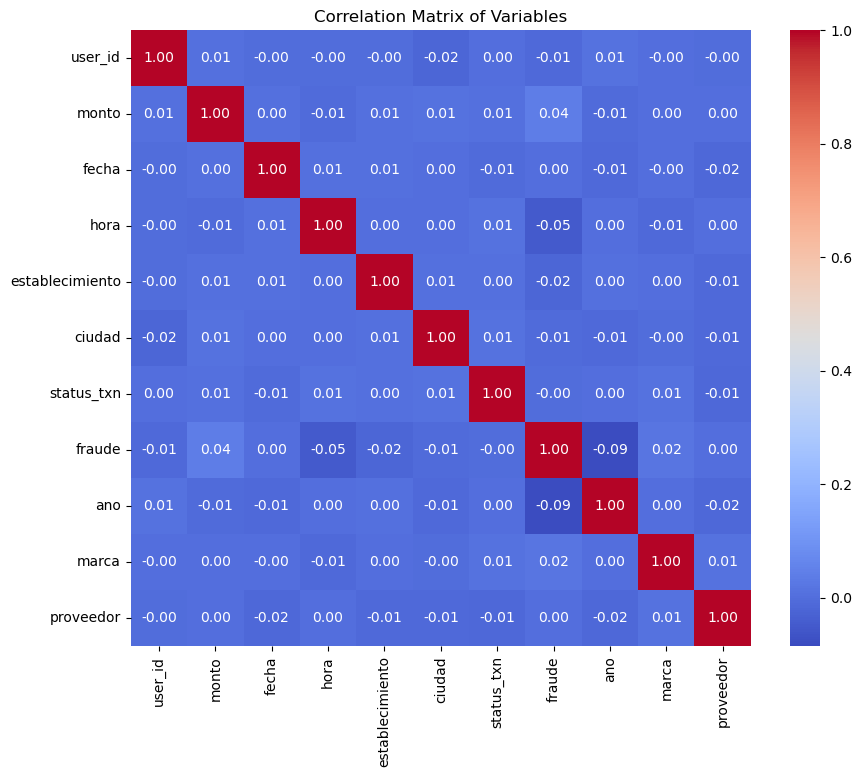

In [52]:
correlation_matrix = data2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

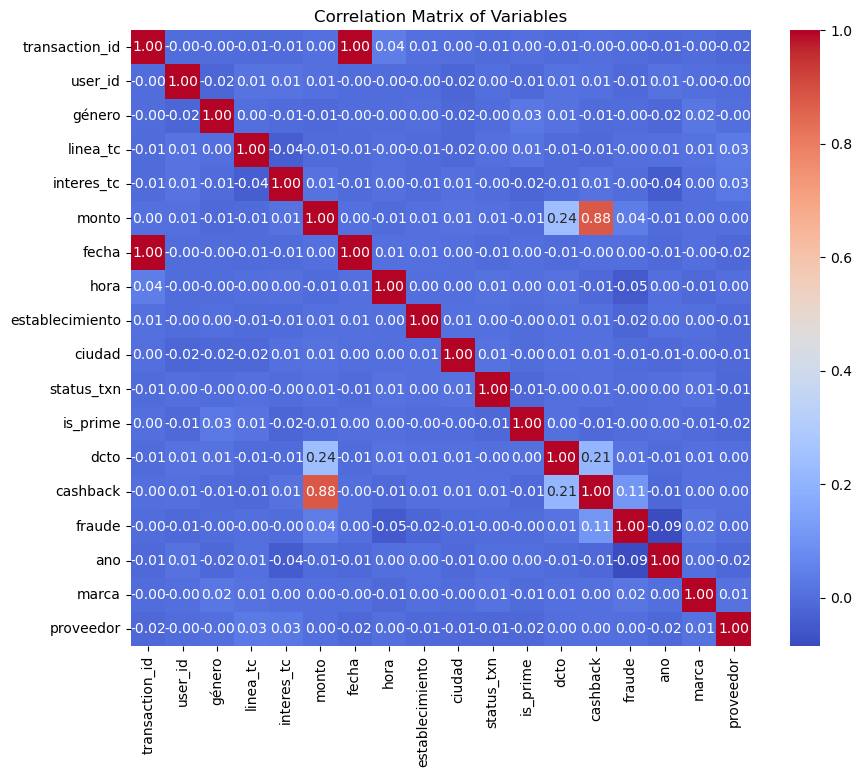

In [53]:
correlation_matrix = data3.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

In [54]:
#LCondiciones de apoyo
'''
datos_fraude2 = datos[(datos['fraude'] == True) & (datos['ciudad'] == 'Monterrey') & ((datos['establecimiento'] == 'Compra en linea')| (datos['establecimiento'] == 'Tienda departamental' ))]
datos_fraude3 = datos[(datos['fraude'] == False) & (datos['ciudad'] == 'Monterrey') & ((datos['establecimiento'] == 'Compra en linea')| (datos['establecimiento'] == 'Tienda departamental' ))]
'''

"\ndatos_fraude2 = datos[(datos['fraude'] == True) & (datos['ciudad'] == 'Monterrey') & ((datos['establecimiento'] == 'Compra en linea')| (datos['establecimiento'] == 'Tienda departamental' ))]\ndatos_fraude3 = datos[(datos['fraude'] == False) & (datos['ciudad'] == 'Monterrey') & ((datos['establecimiento'] == 'Compra en linea')| (datos['establecimiento'] == 'Tienda departamental' ))]\n"

In [55]:
#grafica de apoyo
'''sns.lineplot(x='transaction_id', y='dcto', data=datos_fraude)
plt.xlabel('Columna 1')
plt.ylabel('Columna 2')
plt.title('Gráfico de líneas de Columna 1 vs Columna 2')
plt.show()
'''


"sns.lineplot(x='transaction_id', y='dcto', data=datos_fraude)\nplt.xlabel('Columna 1')\nplt.ylabel('Columna 2')\nplt.title('Gráfico de líneas de Columna 1 vs Columna 2')\nplt.show()\n"